<a href="https://colab.research.google.com/github/5213478/mr1/blob/main/Parallel_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
root_path = '/content/drive/My Drive/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/My Drive
!ls

/content/drive/My Drive
'all class 22'		'double CGDNN 33'
'all class 33'		'model evaluation'
'all class.ipynb'	 mod_rec
'all evaluation.ipynb'	'Parallel network.ipynb'
 AMR-Benchmark		'Parallel network weight'
 attention.ipynb	 Radio-Modulation-Recognition-Networks
 ceshi.ipynb		 RF_modulation_classification
 CGDNN			 RGDNN
 CGDNN.ipynb		 RGDNN.ipynb
 class2			 RLDNN
 classification2	 RLDNN.ipynb
 CLDNNvsCGDNN		 双输入RESNET+CLDNN
'Colab Notebooks'	 辅助.ipynb
'double CGDNN'


In [ ]:
!pip uninstall joblib
!pip install joblib==1.2.0

Found existing installation: joblib 1.1.0
Uninstalling joblib-1.1.0:
  Would remove:
    /usr/local/lib/python3.9/dist-packages/joblib-1.1.0.dist-info/*
    /usr/local/lib/python3.9/dist-packages/joblib/*
Proceed (Y/n)? y
  Successfully uninstalled joblib-1.1.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 KB 21.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires joblib~=1.1.0, but you have joblib 1.2.0 which is incompatible.


In [ ]:
!pip install joblib==

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement joblib== (from versions: 0.3.2d.dev, 0.3.2e.dev, 0.3.2f.dev, 0.3.2g.dev, 0.7.0d, 0.1a0.dev0, 0.2a0.dev0, 0.3a0.dev0, 0.3.1a0.dev0, 0.3.2.dev0, 0.3.2a0.dev0, 0.3.2b0.dev0, 0.3.2rc0.dev0, 0.3.3a0.dev0, 0.3.3b0.dev0, 0.3.3rc0.dev0, 0.3.4.dev0, 0.3.5.dev0, 0.3.6.dev0, 0.3.7.dev0, 0.4.0.dev0, 0.4.1.dev0, 0.4.2.dev0, 0.4.3.dev0, 0.4.4.dev0, 0.4.5.dev0, 0.4.6.dev0, 0.5.0.dev0, 0.5.0a0.dev0, 0.5.1.dev0, 0.5.2.dev0, 0.5.3.dev0, 0.5.4.dev0, 0.5.5.dev0, 0.5.6.dev0, 0.5.7.dev0, 0.5.7a0.dev0, 0.5.7b0.dev0, 0.5.7, 0.6.0a0, 0.6.0b0, 0.6.0b2, 0.6.0b3, 0.6.0, 0.6.1, 0.6.2, 0.6.3, 0.6.4, 0.6.5, 0.7.0a0, 0.7.0b0, 0.7.0rc0, 0.7.1, 0.8.0a0, 0.8.0a2, 0.8.0a3, 0.8.0, 0.8.1, 0.8.2, 0.8.3, 0.8.3.post1, 0.8.4, 0.9.0b2, 0.9.0b3, 0.9.0b4, 0.9.1, 0.9.2, 0.9.3, 0.9.4, 0.10.0, 0.10.2, 0.10.3, 0.11a3, 0.11, 0.12.0, 0.12.1, 0.12.2, 0.12.3, 0.12.4, 0.12.5, 0.1

In [ ]:
import joblib
print(joblib.__version__)


1.1.1


In [ ]:
import joblib
data = joblib.load(root_path + 'Parallel network weight/data/rml_trainvaltest3.hdf5')

In [ ]:
!nvidia-smi

Thu Mar 30 01:07:21 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
#%reset
#%tensorflow_version 1.x
import joblib
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import keras
import math
import tensorflow as tf
from keras.metrics import categorical_accuracy
from keras.models import Sequential, Model, load_model
from keras.layers import Dense, Dropout, Activation, Flatten, Reshape, BatchNormalization, LSTM, Conv1D, MaxPooling1D, Conv2D, Input, Concatenate, Add, ReLU, GRU, GlobalMaxPool2D,multiply, GlobalAveragePooling2D
from keras.layers.convolutional import Convolution1D ,Convolution2D, MaxPooling2D, ZeroPadding2D, AveragePooling2D
from keras.initializers import glorot_uniform, Constant
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.callbacks import EarlyStopping, Callback, ModelCheckpoint
from scipy.interpolate import UnivariateSpline
from keras.utils import to_categorical
from sklearn import preprocessing
from keras.optimizers import Adam
from keras import regularizers
from keras.layers import Lambda

import autograd.numpy as np
from autograd import grad

import keras.backend as K

plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [ ]:
EPOCHS = 100
NUM_CLASSES = 11
BATCH_SIZE = 1024 #time-series
PATIENCE = 10

In [ ]:
#Normalisation is very important
def iq2ampphase(inphase, quad):
    amplitude = np.sqrt(np.square(inphase) + np.square(quad))
    amp_norm = np.linalg.norm(amplitude) #L2 norm
    amplitude = amplitude/amp_norm #normalise
    phase = np.arctan(np.divide(quad, inphase))
    phase = 2.*(phase - np.min(phase))/np.ptp(phase)-1 #rescale phase to range [-1, 1]
    return amplitude, phase

#convert array of multiple iq samples into array of multiple ampphase samples
#ip--ap
def arr_iq2ap(X):
  X_ap = []
  for k in range(X.shape[0]):
    I = X[k][0,:]
    Q = X[k][1,:]
    amp, phase = iq2ampphase(I, Q)
    ap = np.array([amp, phase])#建立数组
    X_ap.append(ap)
  X_ap = np.array(X_ap)
  return X_ap

In [ ]:
#设置混淆矩阵
def generate_confusion_matrix(model, X,y, one_hot_transformer, batch_size):
    """
      y is the one hot encoded label vector passed to the model.evaluate
    """
    #调制--索引
    mod_to_idx = {mod:idx for idx,mod in enumerate(one_hot_transformer.classes_)} # use this to map modulation name to index
    y_hat = model.predict(X, batch_size) #输入测试数据X,输出预测结果y_hat
    y_hat_onehot = np.zeros_like(y_hat) #其维度与矩阵y_hat一致，并为其初始化为全0
    y_hat_onehot[np.arange(len(y_hat)), y_hat.argmax(1)] = 1 # convert the probabilities to one-hot format
    y_hat_mod = one_hot_transformer.inverse_transform(y_hat_onehot) # transform predictions to strings
    y_mod = one_hot_transformer.inverse_transform(y) # transform ground truth back to strings
    confusion_mat = np.zeros([NUM_CLASSES,NUM_CLASSES])

    acc = np.mean(y_mod == y_hat_mod)
    # fill in the confusion matrix
    for i in range(y.shape[0]):
        
        true_idx = mod_to_idx[y_mod[i]]
        pred_idx = mod_to_idx[y_hat_mod[i]]          
        confusion_mat[pred_idx,true_idx] += 1

    # normalize the matrix column wise
    for i in range(NUM_CLASSES):
        if np.sum(confusion_mat[:,i]) > 0:
          confusion_mat[:,i] /= np.sum(confusion_mat[:,i])
    
    return confusion_mat,acc

 
import seaborn as sns
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Oranges, labels=[]):
  ax= plt.subplot()
  sns.heatmap(cm, annot=True, ax = ax, cmap=cmap); #annot=True to annotate cells
  
  plt.title(title)
  tick_marks = np.arange(len(labels))
  plt.xticks(tick_marks, labels, rotation=45)
  plt.yticks(tick_marks, labels, rotation=45)
  plt.tight_layout()
  plt.ylabel('Predicted label')
  plt.xlabel('True label')

In [ ]:
class AdamW:
    def __init__(self, loss, weights, lambda1, lr=0.001, beta1=0.9, beta2=0.999, epislon=1e-8):
        self.loss = loss
        self.theta = weights
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.epislon = epislon
        self.lambda1 = lambda1
        self.get_gradient = grad(loss)
        self.m = 0
        self.v = 0
        self.t = 0

    def minimize_raw(self):
        self.t += 1
        g = self.get_gradient(self.loss)
        self.m = self.beta1 * self.m + (1 - self.beta1) * g
        self.v = self.beta2 * self.v + (1 - self.beta2) * (g * g)
        self.m_hat = self.m / (1 - self.beta1 ** self.t)
        self.v_hat = self.v / (1 - self.beta2 ** self.t)
        self.theta = self.theta - self.lr * (
                    self.m_hat / (self.v_hat ** 0.5 + self.epislon) + self.lambda1 * self.theta)

In [ ]:
#created my own LabelBinarizer class so can encode both 2-class and multiclass cases
#建立分类函数
class MyLabelBinarizer(preprocessing.LabelBinarizer):
    def transform(self, y):
        Y = super().transform(y)
        if self.y_type_ == 'binary':
            return np.hstack((Y, 1-Y))
        else:
            return Y

    def inverse_transform(self, Y, threshold=None):
        if self.y_type_ == 'binary':
            return super().inverse_transform(Y[:, 0], threshold)
        else:
            return super().inverse_transform(Y, threshold)

In [ ]:
class ModelEvaluater:
  def __init__(self, model, X_train, y_train, X_val, y_val, X_test, y_test,
               labels_test, batch_size, model_name, channels_first=True, feature_type=2):
    # 如果通道在前，输入的类型不变
    if channels_first:
      self.X_train = X_train
      self.X_val = X_val
      self.X_test = X_test
    else:
      self.X_train = X_train.reshape([X_train.shape[0], X_train.shape[2], X_train.shape[1]])
      self.X_val = X_val.reshape([X_val.shape[0], X_val.shape[2], X_val.shape[1]])
      self.X_test = X_test.reshape([X_test.shape[0], X_test.shape[2], X_test.shape[1]])
    
    self.feature_type = feature_type
      
    self.model = model
    self.y_train = y_train
    self.y_val = y_val
    self.y_test = y_test
    self.labels_test = labels_test
    self.model_name = model_name
    self._checkpoint_callback = ModelCheckpoint(filepath=root_path + 'Parallel network weight/our3/%s-weights-{epoch}.hdf5' % self.model_name,
                                                verbose=1, save_best_only=True)
    self._train_accs = []
    self._val_accs = []
    self._snr_accs = []
    
    self.batch_size = batch_size
    
    # get the modulation types into an array
    self.mod_types = np.unique(labels_test[:,0])
  
    # fit a label binarizer 
    self.mod_to_onehot = MyLabelBinarizer()
    self.mod_to_onehot.fit(self.mod_types)

    # transform the y values to one-hot encoding
    self.y_train = self.mod_to_onehot.transform(y_train)
    self.y_val = self.mod_to_onehot.transform(y_val)
    self.y_test = self.mod_to_onehot.transform(y_test)
  
    print('y_train %s' %(y_train.shape))
    print('y_val %s' %(y_val.shape))
    print('y_test %s' %(y_test.shape))
    

    
  def fit(self, epochs, patience=10):
    curr_X, curr_y = self.X_train, self.y_train
    val_X, val_y = self.X_val, self.y_val
    callbacks = [self._checkpoint_callback, EarlyStopping(patience=patience)]
   
     # train the model
    model_info = self.model.fit(curr_X, curr_y,
                                batch_size=self.batch_size,
                                epochs=epochs,
                                verbose=1,
                                validation_data=(val_X, val_y),
                                callbacks=callbacks)

    self._train_accs.extend(model_info.history['accuracy'])
    self._val_accs.extend(model_info.history['val_accuracy'])



  def print_summary(self):
    # plot validation accuracy vs training accuracy
    plt.plot(np.arange(len(self._train_accs)), self._train_accs, '-o', label='training accuracy')
    plt.plot(np.arange(len(self._val_accs)), self._val_accs, '-o', label='validation accuracy')
    plt.legend()
    plt.xlabel('epochs')
    plt.title('%s -validation vs training accuracy' %(self.model_name))
    display(plt.show())

    #plot confusion matrix for all, low, med and high SNR
    # 有出处
    snr_ranges = [(-20, 18), (-10, 5), (6, 18)]
    for snr_rng in snr_ranges:
      labels_test = np.array([int(lbl) for lbl in self.labels_test[:,1]])
      idx = np.where((labels_test >= snr_rng[0]) & (labels_test <=snr_rng[1]))
      if self.feature_type==2:
        tmp_img = self.X_test[0]
        tmp_time = self.X_test[1]
        X_snr = [tmp_img[idx], tmp_time[idx]]
      elif self.feature_type==1:
        X_snr = self.X_test[idx]
      y_snr = self.y_test[idx]
      conf_mat, acc = generate_confusion_matrix(self.model, X_snr, y_snr, self.mod_to_onehot, self.batch_size)
      plot_confusion_matrix(conf_mat, labels=self.mod_to_onehot.classes_, 
                            title='%s- Confusion Matrix (SNR in range %s) - acc=%s' %(self.model_name, snr_rng, acc*100))
      plt.show()

    # get accuracy per snr
    snr_accs = {}
    # unique函数去除其中重复的元素，并按元素由大到小返回一个新的无元素重复的元组或者列表
    snrs = np.unique(np.unique(self.labels_test,axis=0)[:,1]).astype('int32')
    for snr in sorted(snrs):
      labels_test = np.array([int(lbl) for lbl in self.labels_test[:,1]])
      idx = np.where(labels_test == snr)

      if self.feature_type==2:
        tmp_img = self.X_test[0]
        tmp_time = self.X_test[1]
        X_snr = [tmp_img[idx], tmp_time[idx]]
      elif self.feature_type==1:
        X_snr = self.X_test[idx]

      y_snr = self.y_test[idx]

      #calculate acc for each snr
      mod_to_idx = {mod:idx for idx,mod in enumerate(self.mod_to_onehot.classes_)} # use this to map modulation name to index
      y_hat = self.model.predict(X_snr, self.batch_size)
      y_hat_onehot = np.zeros_like(y_hat)
      y_hat_onehot[np.arange(len(y_hat)), y_hat.argmax(1)] = 1 # convert the probabilities to one-hot format
      y_hat_mod = self.mod_to_onehot.inverse_transform(y_hat_onehot) # transform predictions to strings
      y_mod = self.mod_to_onehot.inverse_transform(y_snr) # transform ground truth back to strings

      acc = np.mean(y_mod == y_hat_mod)
      snr_accs[snr] = acc

    # plot the accuracy against the snr
    plt.plot(list(snr_accs.keys()),list(snr_accs.values()))
    plt.xlabel("SNR (dB)")
    plt.ylabel("Classification Accuracy")
    plt.xticks(list(snr_accs.keys()))
    plt.yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
    plt.grid(True)
    plt.show()

    # acc--snr曲线图函数
  def accpersnr_model(self):
    snr_accs = {}
    snrs = np.unique(np.unique(self.labels_test,axis=0)[:,1]).astype('int32')
    for snr in sorted(snrs):
      labels_test = np.array([int(lbl) for lbl in self.labels_test[:,1]])
      idx = np.where(labels_test == snr)

      if self.feature_type==2:
        tmp_img = self.X_test[0]
        tmp_time = self.X_test[1]
        X_snr = [tmp_img[idx], tmp_time[idx]]
      elif self.feature_type==1:
        X_snr = self.X_test[idx]
      y_snr = self.y_test[idx]

      #calculate acc for each snr
      mod_to_idx = {mod:idx for idx,mod in enumerate(self.mod_to_onehot.classes_)} # use this to map modulation name to index
      y_hat = self.model.predict(X_snr, self.batch_size)
      y_hat_onehot = np.zeros_like(y_hat)
      y_hat_onehot[np.arange(len(y_hat)), y_hat.argmax(1)] = 1 # convert the probabilities to one-hot format
      y_hat_mod = self.mod_to_onehot.inverse_transform(y_hat_onehot) # transform predictions to strings
      y_mod = self.mod_to_onehot.inverse_transform(y_snr) # transform ground truth back to strings

      acc = np.mean(y_mod == y_hat_mod)
      snr_accs[snr] = acc

    return snr_accs

    # 
  def confmat_snr(self, snr_rng):
      labels_test = np.array([int(lbl) for lbl in self.labels_test[:,1]])
      idx = np.where((labels_test >= snr_rng[0]) & (labels_test <=snr_rng[1]))
      if self.feature_type==2:
        tmp_img = self.X_test[0]
        tmp_time = self.X_test[1]
        X_snr = [tmp_img[idx], tmp_time[idx]]
      elif self.feature_type==1:
        X_snr = self.X_test[idx]
      y_snr = self.y_test[idx]
      conf_mat, acc = generate_confusion_matrix(self.model, X_snr, y_snr, self.mod_to_onehot, self.batch_size)
      plot_confusion_matrix(conf_mat, labels=self.mod_to_onehot.classes_, 
                            title='%s- Confusion Matrix (SNR in range %s) - acc=%s' %(self.model_name, snr_rng, acc*100))
      plt.show()

In [ ]:
#quick understanding of data
print(data.keys())
print('Train val test size: ', data['train']['X'].shape, data['val']['X'].shape, data['test']['X'].shape)
print('Check if data is shuffled: ', data['val']['labels'][:10])

uniq, counts = np.unique(data['train']['labels'][:,1], return_counts = True)
print('Check snr range: ', uniq)
print('Check distribution of samples across SNR: ', counts)

uniq, counts = np.unique(data['train']['labels'][:,0], return_counts = True)
print('Check modulation types: ', uniq)
print('Check distribution of samples across modulation types: ', counts)

dict_keys(['train', 'val', 'test'])
Train val test size:  (147400, 2, 128) (28600, 2, 128) (44000, 2, 128)
Check if data is shuffled:  [['QAM64' '12']
 ['QAM64' '-20']
 ['QAM64' '-20']
 ['CPFSK' '12']
 ['WBFM' '18']
 ['AM-DSB' '-20']
 ['PAM4' '-12']
 ['QAM64' '-4']
 ['PAM4' '12']
 ['QAM64' '10']]
Check snr range:  ['-10' '-12' '-14' '-16' '-18' '-2' '-20' '-4' '-6' '-8' '0' '10' '12'
 '14' '16' '18' '2' '4' '6' '8']
Check distribution of samples across SNR:  [7327 7467 7344 7417 7402 7428 7457 7344 7335 7355 7362 7329 7315 7407
 7362 7366 7483 7278 7306 7316]
Check modulation types:  ['8PSK' 'AM-DSB' 'AM-SSB' 'BPSK' 'CPFSK' 'GFSK' 'PAM4' 'QAM16' 'QAM64'
 'QPSK' 'WBFM']
Check distribution of samples across modulation types:  [13447 13432 13547 13458 13375 13356 13336 13320 13329 13403 13397]


In [ ]:
#load data
X_train = data['train']['X']
labels_train = data['train']['labels'] 
y_train = labels_train[:,0]

X_val = data['val']['X']
labels_val = data['val']['labels'] 
y_val = labels_val[:,0]

X_test = data['test']['X']
labels_test = data['test']['labels'] 
y_test = labels_test[:,0]

In [ ]:
#convert to ampphase
X_ap_train = arr_iq2ap(X_train)
X_ap_val = arr_iq2ap(X_val)
X_ap_test = arr_iq2ap(X_test)

In [ ]:
def eca(inputs, b=1, gama=2):
 
 # 输入特征图的通道数
 in_channel = inputs.shape[-1]
 
 # 根据公式计算自适应卷积核大小
 kernel_size = int(abs((math.log(in_channel, 2) + b) / gama))
 
 # 如果卷积核大小是偶数，就使用它
 if kernel_size % 2:
  kernel_size = kernel_size
 
 # 如果卷积核大小是奇数就变成偶数
 else:
  kernel_size = kernel_size + 1
 
 # [h,w,c]==>[None,c] 全局平均池化
 x = keras.layers.GlobalAveragePooling2D()(inputs)
 
 # [None,c]==>[c,1]
 x = keras.layers.Reshape(target_shape=(in_channel, 1))(x)
 
 # [c,1]==>[c,1]
 x = keras.layers.Conv1D(filters=1, kernel_size=kernel_size, padding='same', use_bias=False)(x)
 
 # sigmoid激活
 x = keras.layers.Activation('sigmoid')(x)
 
 # [c,1]==>[1,1,c]
 x = keras.layers.Reshape((1,1,in_channel))(x)
 
 # 结果和输入相乘
 outputs = keras.layers.multiply([inputs, x])
 
 return outputs

In [ ]:
def channel_attention(input_feature,ratio):

    channel = input_feature.get_shape()[-1]

    shared_layer_one = Dense(channel // ratio,
                             activation='relu',
                             kernel_initializer='he_normal',
                             use_bias=True,
                             bias_initializer='zeros')
    shared_layer_two = Dense(channel,
                             kernel_initializer='he_normal',
                             use_bias=True,
                             bias_initializer='zeros')
    avg_pool = GlobalAveragePooling2D()(input_feature)
    avg_pool = shared_layer_one(avg_pool)
    avg_pool = shared_layer_two(avg_pool)

    max_pool = GlobalMaxPool2D()(input_feature)
    max_pool = shared_layer_one(max_pool)
    max_pool = shared_layer_two(max_pool)

    cbam = Add()([avg_pool,max_pool])
    cbam = Activation('sigmoid')(cbam)

    return multiply([input_feature,cbam])

def spatial_attention(input_feature):

    avg_pool = Lambda(lambda x:K.mean(x,axis=3,keepdims=True))(input_feature)
    max_pool = Lambda(lambda x:K.max(x,axis=3,keepdims=True))(input_feature)

    concat = Concatenate(axis=3)([avg_pool,max_pool])
    cbam_feature = Conv2D(1,(7,7),strides=1,padding='same',activation='sigmoid')(concat)

    return multiply([input_feature,cbam_feature])

def CBAM(cbam_feature,ratio=8):
    cbam_feature = channel_attention(cbam_feature, ratio)
    cbam_feature = spatial_attention(cbam_feature)
    return cbam_feature

In [ ]:
def senet(x):
  in_channel = x.shape[-1]
  x00 = keras.layers.GlobalAveragePooling2D()(x)
  # 全局平均池化[h,w,c]==>[None,c]
  #input_plane = Input(shape=(CHANNELS+num, CHANNELS+num, 1)) 
  #input_1 = input_plane[:,:CHANNELS, :CHANNELS,:]
  #input_1= Input(shape=(CHANNELS, CHANNELS, 1)) #采用Input层来构建input_1

  x0 = x00[:, None, None, :]
  # [None,c]==>[1,1,c]
  #x = keras.layers.Reshape(target_shape=(1,1,in_channel))(x)
  #x = Input(shape=(1, 1, in_channel))
 # [1,1,c]==>[1,1,c/4]
 # x1 = keras.layers.Conv2D(filters=in_channel//4, kernel_size=1, strides=1)(x0)  # 全连接下降通道数
  x1 = keras.layers.Dense(in_channel//2)(x0)
 # relu激活
  x2 = keras.layers.Activation('relu')(x1)
 
 # [1,1,c/4]==>[1,1,c]
  x3 = keras.layers.Dense(in_channel)(x2)  # 全连接上升通道数
 
 # sigmoid激活，权重归一化
  x4 = keras.layers.Activation('sigmoid')(x3)
 
 # [h,w,c]*[1,1,c]==>[h,w,c]
  new_x = keras.layers.multiply([x, x4])  # 归一化权重和原输入特征图逐通道相乘
  return new_x

In [ ]:
def coordinate(inputs,ratio=2, name="name"):
    W,H,C = [int(x) for x in inputs.shape[1:]]
    temp_dim = max(int(C//ratio),ratio)
    H_pool = Lambda(lambda x: tf.reduce_mean(x, axis=1))(inputs)
    W_pool = Lambda(lambda x: tf.reduce_mean(x, axis=2))(inputs)
    x = Concatenate(axis=1)([H_pool,W_pool])
    x = Reshape((1,W+H,C))(x)
    x = Conv2D(temp_dim,1, name=name+'1')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x_h,x_w = Lambda(lambda x:tf.split(x,[H,W],axis=2))(x)
    x_w = Reshape((W,1,temp_dim))(x_w)

    x_h = Conv2D(C,1,activation='sigmoid',name=name+"2")(x_h)
    x_w = Conv2D(C, 1, activation='sigmoid',name=name+"3")(x_w)
    x = keras.layers.multiply([inputs,x_h,x_w])
    x = Add()([inputs,x])
    return x

In [ ]:
def coordinate2(inputs,ratio=2, name="name2"):
    W,H,C = [int(x) for x in inputs.shape[1:]]
    temp_dim = max(int(C//ratio),ratio)
    H_pool = Lambda(lambda x: tf.reduce_mean(x, axis=1))(inputs)
    W_pool = Lambda(lambda x: tf.reduce_mean(x, axis=2))(inputs)
    x = Concatenate(axis=1)([H_pool,W_pool])
    x = Reshape((1,W+H,C))(x)
    x = Conv2D(temp_dim,1, name=name+'1')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x_h,x_w = Lambda(lambda x:tf.split(x,[H,W],axis=2))(x)
    x_w = Reshape((W,1,temp_dim))(x_w)

    x_h = Conv2D(C,1,activation='sigmoid',name=name+"2")(x_h)
    x_w = Conv2D(C, 1, activation='sigmoid',name=name+"3")(x_w)
    x = keras.layers.multiply([inputs,x_h,x_w])
    x = Add()([inputs,x])
    return x

In [ ]:
dr = 0.5
X_train2 = X_train.reshape(X_train.shape[0], 1, X_train.shape[1], X_train.shape[2])
X_val2 = X_val.reshape(X_val.shape[0], 1, X_val.shape[1], X_val.shape[2])
X_test2 = X_test.reshape(X_test.shape[0], 1, X_test.shape[1], X_test.shape[2])

input_x = Input(shape=(1, X_test.shape[1],X_test.shape[2]))

#input_x = senet(input_x)
#x = eca(input_x)

input_x_padding = ZeroPadding2D((0, 2), data_format="channels_first")(input_x)

layer1 = Conv2D(50, (1, 8), padding='valid', activation="relu", name="conv1", kernel_initializer='glorot_uniform', data_format="channels_first")(input_x_padding)
#layer1 = senet(layer1)
#layer1 = eca(layer1)
#layer1 = coordinate(layer1)
#layer1 = CBAM(layer1)
#layer1 = Dropout(dr)(layer1)
layer1 = ZeroPadding2D((0, 2), data_format="channels_first")(layer1)

layer2 = Conv2D(50, (1, 8), padding="valid", activation="relu", name="conv2", kernel_initializer='glorot_uniform', data_format="channels_first")(layer1)
#layer2 = Dropout(dr)(layer2)
layer2 = ZeroPadding2D((0, 2), data_format="channels_first")(layer2)

layer3 = Conv2D(50, (1, 8), padding='valid', activation="relu", name="conv3", kernel_initializer='glorot_uniform', data_format="channels_first")(layer2)
#layer3 = Dropout(dr)(layer3)

#concat = layer3

concat = keras.layers.concatenate([layer1, layer3])

concat = eca(concat)
#concat = senet(concat)
#concat = coordinate(concat)
#concat = CBAM(concat)

concat_size = list(np.shape(concat))
input_dim = int(concat_size[-1] * concat_size[-2])
timesteps = int(concat_size[-3])
concat = Reshape((timesteps, input_dim))(concat)

#gru_out = GRU(50, activation='tanh', input_dim=input_dim, input_length=timesteps)(concat)
#LSTM_out = LSTM(50, activation='tanh', input_dim=input_dim, input_length=timesteps, return_sequences=True)(concat)
#layer_dense1 = Dense(256, activation='selu', kernel_initializer='he_normal', name="dense101")(gru_out)

#gru_out = Dropout(dr)(gru_out)

#LSTM_out = Reshape((1,50))(LSTM_out)

model1 = Model(inputs=input_x, outputs=concat)

model1.compile()

model1.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 1, 2, 128)]  0           []                               
                                                                                                  
 zero_padding2d_12 (ZeroPadding  (None, 1, 2, 132)   0           ['input_5[0][0]']                
 2D)                                                                                              
                                                                                                  
 conv1 (Conv2D)                 (None, 50, 2, 125)   450         ['zero_padding2d_12[0][0]']      
                                                                                                  
 zero_padding2d_13 (ZeroPadding  (None, 50, 2, 129)  0           ['conv1[0][0]']            

In [ ]:
X_ap_train2 = X_ap_train.reshape(X_ap_train.shape[0], 1, X_ap_train.shape[1], X_ap_train.shape[2])
X_ap_val2 = X_ap_val.reshape(X_ap_val.shape[0], 1, X_ap_val.shape[1], X_ap_val.shape[2])
X_ap_test2 = X_ap_test.reshape(X_ap_test.shape[0], 1, X_ap_test.shape[1], X_ap_test.shape[2])


input_x = Input(shape=(1, X_ap_test.shape[1], X_ap_test.shape[2]))

#input_x = senet(input_x)
#x = eca(input_x)

input_x_padding = ZeroPadding2D((0, 2), data_format="channels_first")(input_x)

layer1 = Conv2D(50, (1, 8), padding='valid', activation="relu", name="conv21", kernel_initializer='glorot_uniform', data_format="channels_first")(input_x_padding)
#layer1 = senet(layer1)
#layer1 = eca(layer1)
#layer1 = coordinate2(layer1)
#layer1 = CBAM(layer1)
#layer1 = Dropout(dr)(layer1)
layer1 = ZeroPadding2D((0, 2), data_format="channels_first")(layer1)

layer2 = Conv2D(50, (1, 8), padding="valid", activation="relu", name="conv22", kernel_initializer='glorot_uniform', data_format="channels_first")(layer1)
#layer2 = Dropout(dr)(layer2)
layer2 = ZeroPadding2D((0, 2), data_format="channels_first")(layer2)

layer3 = Conv2D(50, (1, 8), padding='valid', activation="relu", name="conv23", kernel_initializer='glorot_uniform', data_format="channels_first")(layer2)
#layer3 = Dropout(dr)(layer3)

#concat = layer3

concat = keras.layers.concatenate([layer1, layer3])

concat = eca(concat)
#concat = senet(concat)
#concat = coordinate2(concat)
#concat = CBAM(concat)

concat_size = list(np.shape(concat))
input_dim = int(concat_size[-1] * concat_size[-2])
timesteps = int(concat_size[-3])
concat = Reshape((timesteps, input_dim))(concat)
#gru_out = GRU(50, activation='tanh', input_dim=input_dim, input_length=timesteps)(concat)
#layer_dense1 = Dense(256, activation='selu', kernel_initializer='he_normal', name="dense101")(gru_out)
#LSTM_out = LSTM(50, activation='tanh', input_dim=input_dim, input_length=timesteps, return_sequences=True)(concat)
#gru_out = Dropout(dr)(gru_out)

#LSTM_out = Reshape((50,1))(LSTM_out)

model2 = Model(inputs=input_x, outputs=concat)

model2.compile()

model2.summary()

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 1, 2, 128)]  0           []                               
                                                                                                  
 zero_padding2d_15 (ZeroPadding  (None, 1, 2, 132)   0           ['input_6[0][0]']                
 2D)                                                                                              
                                                                                                  
 conv21 (Conv2D)                (None, 50, 2, 125)   450         ['zero_padding2d_15[0][0]']      
                                                                                                  
 zero_padding2d_16 (ZeroPadding  (None, 50, 2, 129)  0           ['conv21[0][0]']           

In [ ]:
!pip install tensorflow_addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 21.8 MB/s eta 0:00:00


In [ ]:
from tensorflow_addons.optimizers import AdamW

In [ ]:
adamw = AdamW(weight_decay=1e-4)

In [ ]:
mergedOut = keras.layers.concatenate([model1.output,model2.output]) 
# output layer
#mergedOut = Flatten()(mergedOut)
#mergedOut = Reshape((50,1))(mergedOut)
mergedOut = Dropout(dr)(mergedOut)
#mergedOut = GRU(100, activation='tanh', input_dim=input_dim, input_length=timesteps, return_sequences=True)(mergedOut)
#mergedOut = Dropout(dr)(mergedOut)
mergedOut = GRU(50, activation='tanh', input_dim=input_dim, input_length=timesteps)(mergedOut)
#mergedOut = Flatten()(mergedOut)
mergedOut = Dropout(dr)(mergedOut)
#mergedOut = Dense(128, activation='selu')(mergedOut)
#mergedOut = Flatten()(mergedOut)
#mergedOut = Dropout(dr)(mergedOut)
mergedOut = Dense(11, activation='softmax')(mergedOut)
newModel = Model([model1.input,model2.input], mergedOut)
#newModel.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(lr=0.00018),metrics=['accuracy'])
#newModel.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
newModel.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
#optimizer = AdamW()
#newModel.compile(loss='categorical_crossentropy',optimizer=adamw, metrics=['accuracy'])
newModel.summary()

Model: "model_9"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 1, 2, 128)]  0           []                               
                                                                                                  
 input_6 (InputLayer)           [(None, 1, 2, 128)]  0           []                               
                                                                                                  
 zero_padding2d_12 (ZeroPadding  (None, 1, 2, 132)   0           ['input_5[0][0]']                
 2D)                                                                                              
                                                                                                  
 zero_padding2d_15 (ZeroPadding  (None, 1, 2, 132)   0           ['input_6[0][0]']          

In [ ]:
our_model_evaluater = ModelEvaluater(newModel, [X_train2,X_ap_train2], y_train, [X_val2,X_ap_val2], y_val, [X_test2,X_ap_test2], y_test, labels_test, BATCH_SIZE, 'Our' )
our_model_evaluater.fit(EPOCHS, patience=PATIENCE)
#our_model_evaluater.print_summary()

y_train 147400
y_val 28600
y_test 44000
Epoch 1/100
144/144 [==============================] - ETA: 0s - loss: 1.1427 - accuracy: 0.5686
Epoch 1: val_loss improved from inf to 1.11722, saving model to /content/drive/My Drive/Parallel network weight/our3/Our-weights-1.hdf5
144/144 [==============================] - 18s 127ms/step - loss: 1.1427 - accuracy: 0.5686 - val_loss: 1.1172 - val_accuracy: 0.5784
Epoch 2/100
144/144 [==============================] - ETA: 0s - loss: 1.1425 - accuracy: 0.5690
Epoch 2: val_loss improved from 1.11722 to 1.11019, saving model to /content/drive/My Drive/Parallel network weight/our3/Our-weights-2.hdf5
144/144 [==============================] - 19s 129ms/step - loss: 1.1425 - accuracy: 0.5690 - val_loss: 1.1102 - val_accuracy: 0.5801
Epoch 3/100
144/144 [==============================] - ETA: 0s - loss: 1.1405 - accuracy: 0.5695
Epoch 3: val_loss did not improve from 1.11019
144/144 [==============================] - 19s 129ms/step - loss: 1.1405 - acc

y_train 147400
y_val 28600
y_test 44000


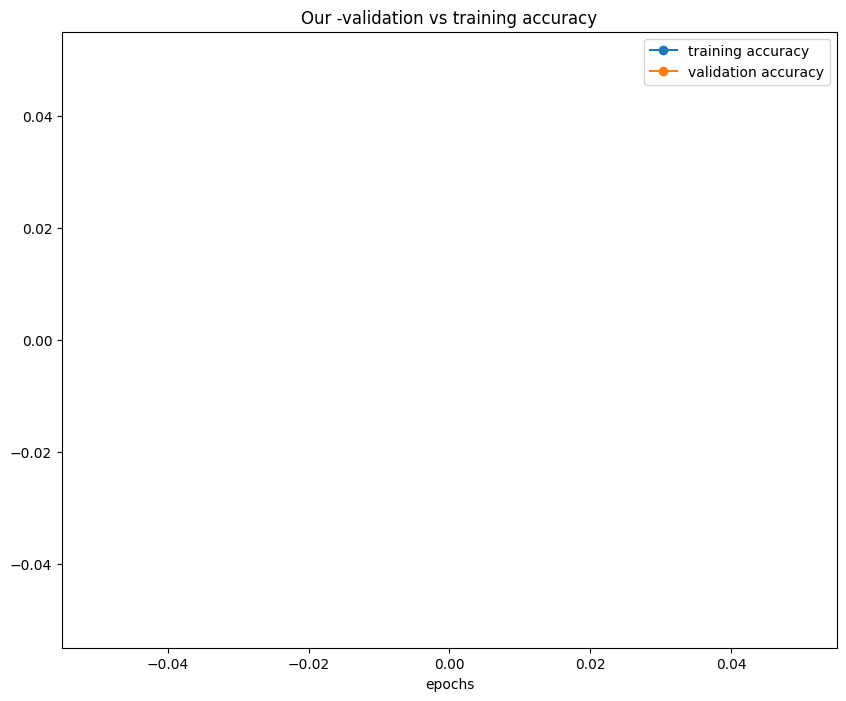

None

43/43 [==============================] - 2s 37ms/step


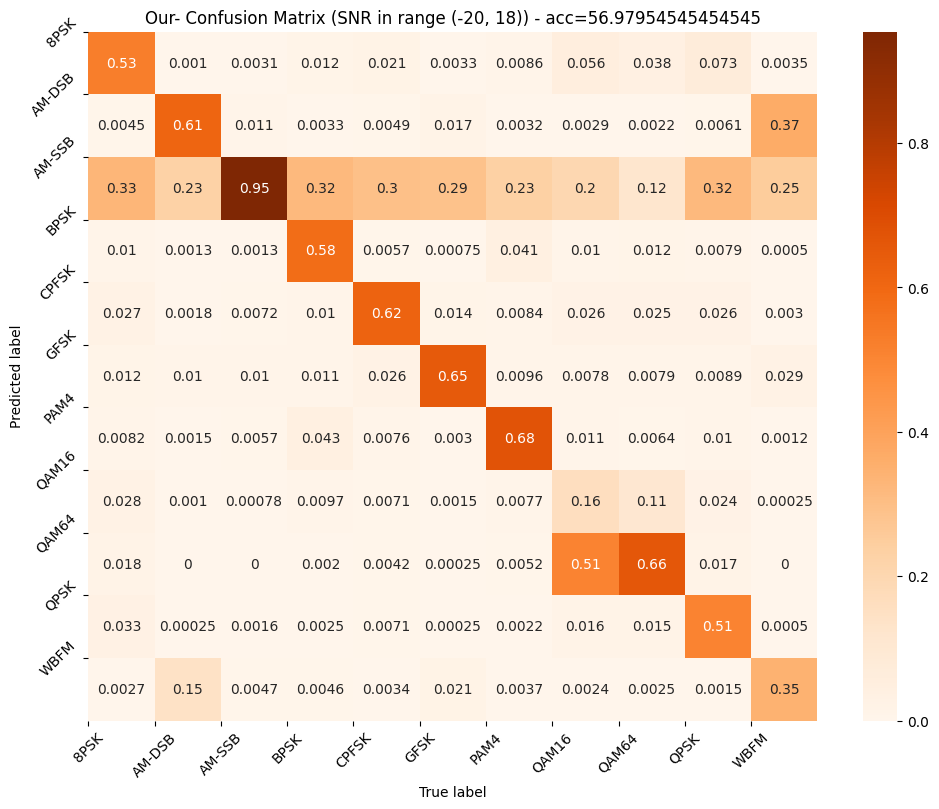

18/18 [==============================] - 1s 35ms/step


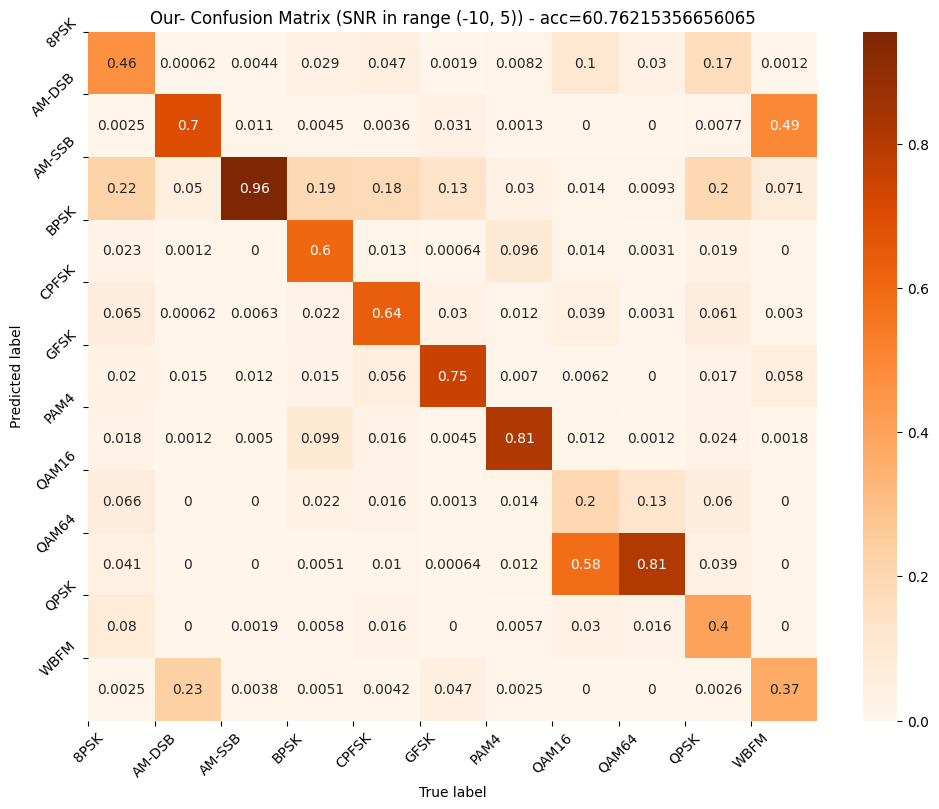

16/16 [==============================] - 1s 35ms/step


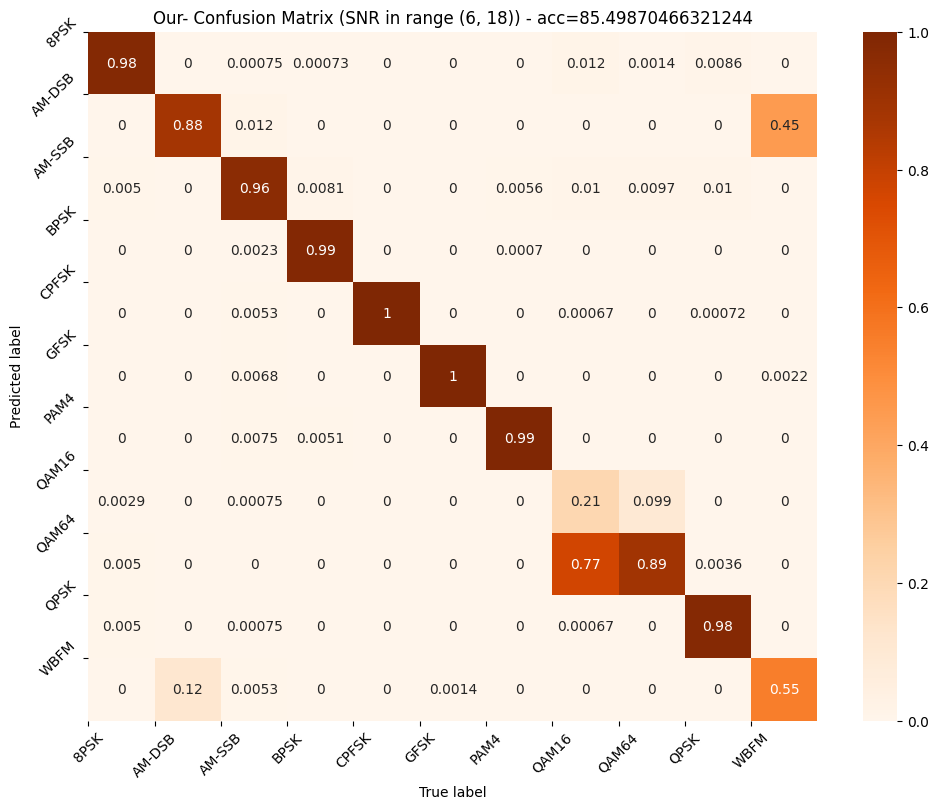

3/3 [==============================] - 0s 39ms/step


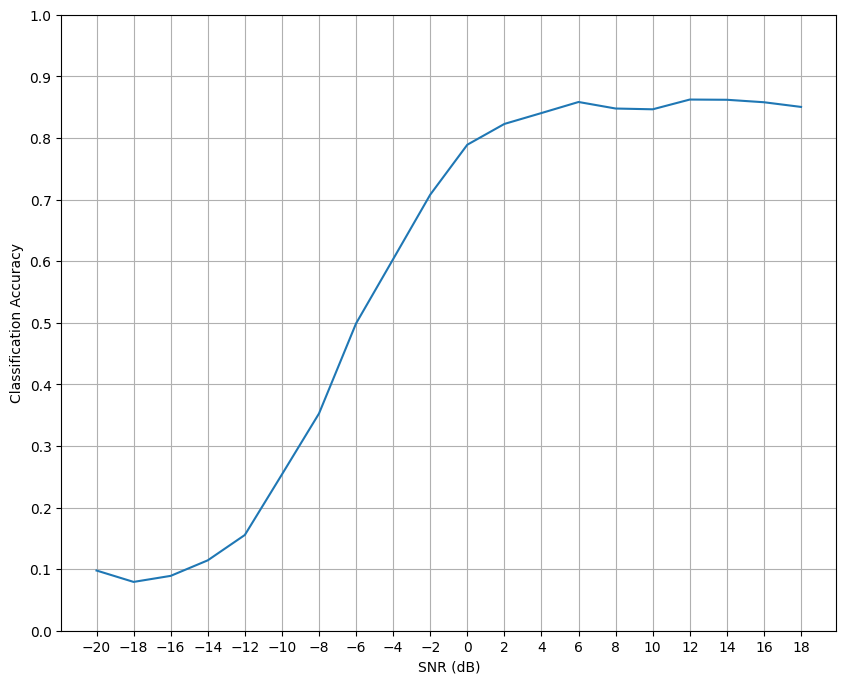

In [ ]:
newModel.load_weights(root_path + 'Parallel network weight/our3/Our-weights-2.hdf5')
our_model_evaluater = ModelEvaluater(newModel, [X_train2,X_ap_train2], y_train, [X_val2,X_ap_val2], y_val, [X_test2,X_ap_test2], y_test, labels_test, BATCH_SIZE, 'Our' )
our_model_evaluater.print_summary()

In [ ]:
mergedOut = keras.layers.concatenate([model1.output,model2.output]) 
# output layer
#mergedOut = Flatten()(mergedOut)
#mergedOut = Reshape((50,1))(mergedOut)
mergedOut = Dropout(dr)(mergedOut)
#mergedOut = GRU(100, activation='tanh', input_dim=input_dim, input_length=timesteps, return_sequences=True)(mergedOut)
#mergedOut = Dropout(dr)(mergedOut)
mergedOut = GRU(50, activation='tanh', input_dim=input_dim, input_length=timesteps, return_sequences=True)(mergedOut)
#mergedOut = Flatten()(mergedOut)
mergedOut = Dropout(dr)(mergedOut)
#mergedOut = Dense(128, activation='selu')(mergedOut)
mergedOut = Flatten()(mergedOut)
mergedOut = Dropout(dr)(mergedOut)
mergedOut = Dense(11, activation='softmax')(mergedOut)
newModel = Model([model1.input,model2.input], mergedOut)
#newModel.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(lr=0.00018),metrics=['accuracy'])
#newModel.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
newModel.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
#optimizer = AdamW()
#newModel.compile(loss='categorical_crossentropy',optimizer=adamw, metrics=['accuracy'])
newModel.summary()

Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 1, 2, 128)]  0           []                               
                                                                                                  
 input_6 (InputLayer)           [(None, 1, 2, 128)]  0           []                               
                                                                                                  
 zero_padding2d_12 (ZeroPadding  (None, 1, 2, 132)   0           ['input_5[0][0]']                
 2D)                                                                                              
                                                                                                  
 zero_padding2d_15 (ZeroPadding  (None, 1, 2, 132)   0           ['input_6[0][0]']          

y_train 147400
y_val 28600
y_test 44000
Epoch 1/300
144/144 [==============================] - ETA: 0s - loss: 1.0930 - accuracy: 0.6000
Epoch 1: val_loss improved from inf to 1.08553, saving model to /content/drive/My Drive/Parallel network weight/our11/Our-weights-1.hdf5
144/144 [==============================] - 20s 140ms/step - loss: 1.0930 - accuracy: 0.6000 - val_loss: 1.0855 - val_accuracy: 0.5995
Epoch 2/300
144/144 [==============================] - ETA: 0s - loss: 1.0924 - accuracy: 0.5994
Epoch 2: val_loss improved from 1.08553 to 1.08478, saving model to /content/drive/My Drive/Parallel network weight/our11/Our-weights-2.hdf5
144/144 [==============================] - 20s 142ms/step - loss: 1.0924 - accuracy: 0.5994 - val_loss: 1.0848 - val_accuracy: 0.6020
Epoch 3/300
144/144 [==============================] - ETA: 0s - loss: 1.0901 - accuracy: 0.6016
Epoch 3: val_loss did not improve from 1.08478
144/144 [==============================] - 20s 137ms/step - loss: 1.0901 - a

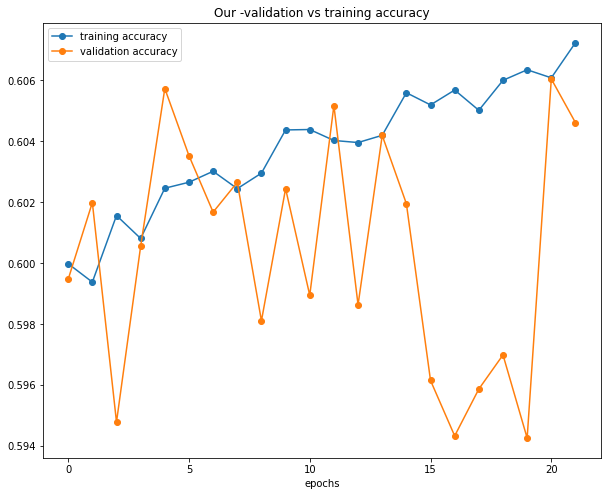

None

43/43 [==============================] - 2s 41ms/step


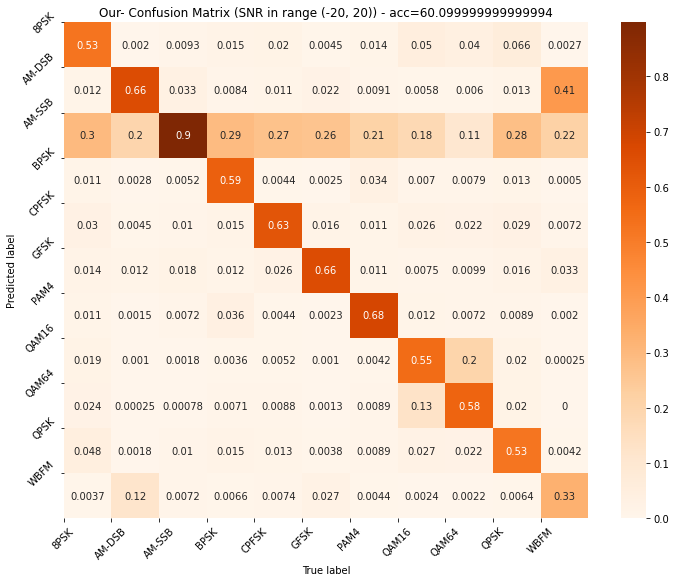

18/18 [==============================] - 1s 40ms/step


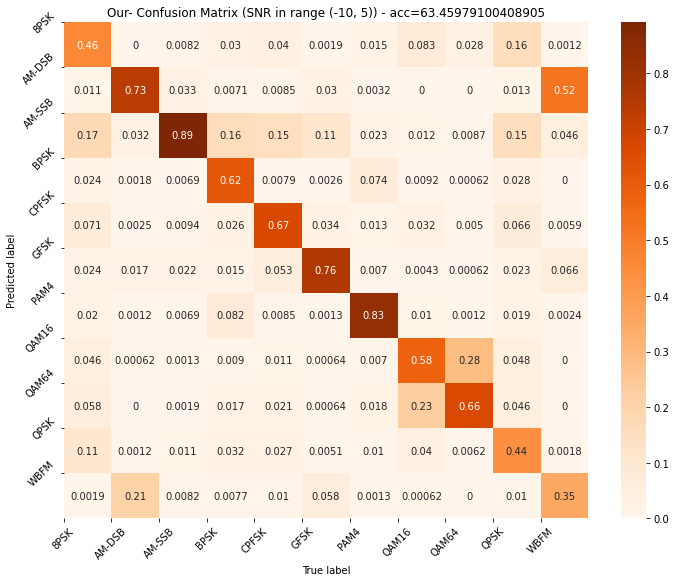

16/16 [==============================] - 1s 40ms/step


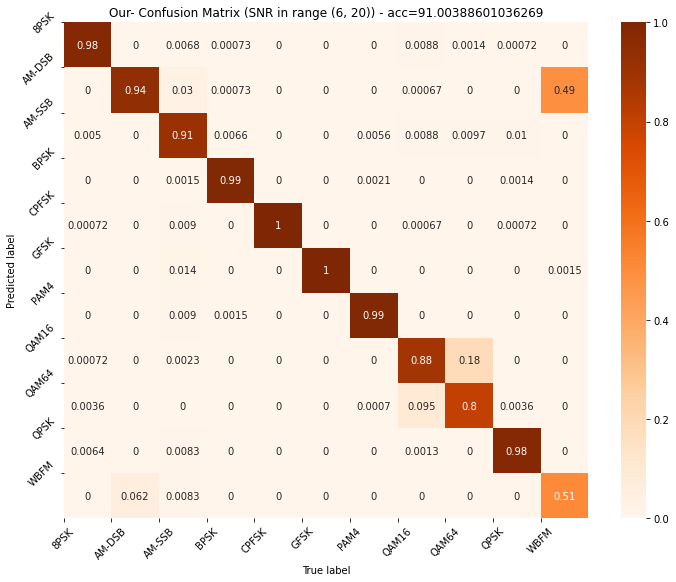

3/3 [==============================] - 0s 40ms/step


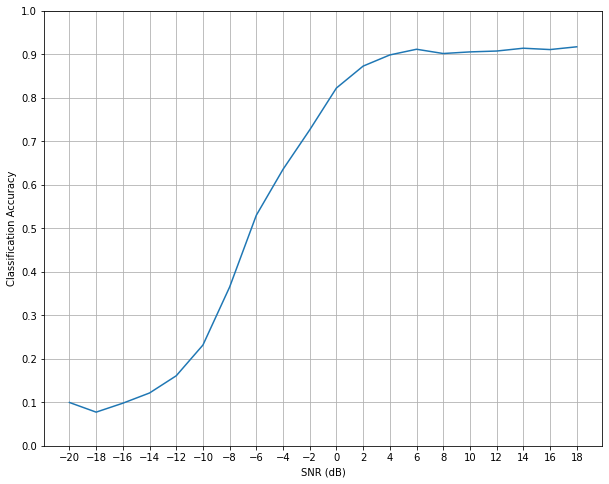

In [ ]:
cldnn_model_evaluater = ModelEvaluater(newModel, [X_train2,X_ap_train2], y_train, [X_val2,X_ap_val2], y_val, [X_test2,X_ap_test2], y_test, labels_test, BATCH_SIZE, 'Our' )
cldnn_model_evaluater.fit(EPOCHS, patience=PATIENCE)
cldnn_model_evaluater.print_summary()

In [ ]:
dr = 0.5
def residual_stack(x, f):
    # 1x1 conv linear
    x = Conv1D(f, 1, strides=1, padding='same', data_format='channels_last')(x)
    x = Activation('linear')(x)
    
    # residual unit 1    
    x_shortcut = x
    x = Conv1D(f, 3, strides=1, padding="same", data_format='channels_last')(x)
    x = Activation('relu')(x)
    x = Conv1D(f, 3, strides=1, padding="same", data_format='channels_last')(x)
    x = Activation('linear')(x)
    # add skip connection
    if x.shape[1:] == x_shortcut.shape[1:]:
      x = Add()([x, x_shortcut])
    else:
      raise Exception('Skip Connection Failure!')
      
    # residual unit 2    
    x_shortcut = x
    x = Conv1D(f, 3, strides=1, padding="same", data_format='channels_last')(x)
    x = Activation('relu')(x)
    x = Conv1D(f, 3, strides = 1, padding = "same", data_format='channels_last')(x)
    x = Activation('linear')(x)
    # add skip connection
    if x.shape[1:] == x_shortcut.shape[1:]:
      x = Add()([x, x_shortcut])
    else:
      raise Exception('Skip Connection Failure!')
      
    # max pooling layer
    x = MaxPooling1D(pool_size=2, strides=None, padding='valid', data_format='channels_last')(x)
    return x


x_input = Input((X_test.shape[2],X_test.shape[1]))
x = x_input
    # residual stack
num_filters = 40
x = residual_stack(x, num_filters)
x = residual_stack(x, num_filters)
x = residual_stack(x, num_filters)
x = residual_stack(x, num_filters)
x = residual_stack(x, num_filters)

model1 = Model(inputs=x_input, outputs=x)

model1.compile()

model1.summary()

ValueError: ignored

In [ ]:
def residual_stack(x, f):
    # 1x1 conv linear
    x = Conv1D(f, 1, strides=1, padding='same', data_format='channels_last')(x)
    x = Activation('linear')(x)
    
    # residual unit 1    
    x_shortcut = x
    x = Conv1D(f, 3, strides=1, padding="same", data_format='channels_last')(x)
    x = Activation('relu')(x)
    x = Conv1D(f, 3, strides=1, padding="same", data_format='channels_last')(x)
    x = Activation('linear')(x)
    # add skip connection
    if x.shape[1:] == x_shortcut.shape[1:]:
      x = Add()([x, x_shortcut])
    else:
      raise Exception('Skip Connection Failure!')
      
    # residual unit 2    
    x_shortcut = x
    x = Conv1D(f, 3, strides=1, padding="same", data_format='channels_last')(x)
    x = Activation('relu')(x)
    x = Conv1D(f, 3, strides = 1, padding = "same", data_format='channels_last')(x)
    x = Activation('linear')(x)
    # add skip connection
    if x.shape[1:] == x_shortcut.shape[1:]:
      x = Add()([x, x_shortcut])
    else:
      raise Exception('Skip Connection Failure!')
      
    # max pooling layer
    x = MaxPooling1D(pool_size=2, strides=None, padding='valid', data_format='channels_last')(x)
    return x


x_input = Input((X_ap_test.shape[2], X_ap_test.shape[1]))
x = x_input
    # residual stack
num_filters = 40
x = residual_stack(x, num_filters)
x = residual_stack(x, num_filters)
x = residual_stack(x, num_filters)
x = residual_stack(x, num_filters)
x = residual_stack(x, num_filters)

model2 = Model(inputs=x_input, outputs=x)

model2.compile()

model2.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 128, 2)]     0           []                               
                                                                                                  
 conv1d_135 (Conv1D)            (None, 128, 40)      120         ['input_7[0][0]']                
                                                                                                  
 activation_135 (Activation)    (None, 128, 40)      0           ['conv1d_135[0][0]']             
                                                                                                  
 conv1d_136 (Conv1D)            (None, 128, 40)      4840        ['activation_135[0][0]']         
                                                                                            

In [ ]:
mergedOut = keras.layers.concatenate([model1.output,model2.output]) 
# output layer
#mergedOut = Flatten()(mergedOut)
mergedOut = Dropout(dr)(mergedOut)
#mergedOut = GRU(100, activation='tanh', input_dim=input_dim, input_length=timesteps, return_sequences=True)(mergedOut)
#mergedOut = Dropout(dr)(mergedOut)
mergedOut = GRU(50, activation='tanh')(mergedOut)
#mergedOut = Dense(256, activation='softmax')(mergedOut)
#mergedOut = Dropout(dr)(mergedOut)
mergedOut = Dense(11, activation='softmax')(mergedOut)
newModel = Model([model1.input,model2.input], mergedOut)
newModel.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(lr=0.00018),metrics=['accuracy'])
newModel.summary()

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 128, 2)]     0           []                               
                                                                                                  
 input_7 (InputLayer)           [(None, 128, 2)]     0           []                               
                                                                                                  
 conv1d_110 (Conv1D)            (None, 128, 40)      120         ['input_6[0][0]']                
                                                                                                  
 conv1d_135 (Conv1D)            (None, 128, 40)      120         ['input_7[0][0]']                
                                                                                            

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


                                                                                                  
 activation_151 (Activation)    (None, 16, 40)       0           ['conv1d_151[0][0]']             
                                                                                                  
 conv1d_127 (Conv1D)            (None, 16, 40)       4840        ['activation_126[0][0]']         
                                                                                                  
 conv1d_152 (Conv1D)            (None, 16, 40)       4840        ['activation_151[0][0]']         
                                                                                                  
 activation_127 (Activation)    (None, 16, 40)       0           ['conv1d_127[0][0]']             
                                                                                                  
 activation_152 (Activation)    (None, 16, 40)       0           ['conv1d_152[0][0]']             
          

y_train 147400
y_val 28600
y_test 44000
Epoch 1/300
144/144 [==============================] - ETA: 0s - loss: 2.0544 - accuracy: 0.2493
Epoch 1: val_loss improved from inf to 1.70728, saving model to /content/gdrive/My Drive/Parallel network weight/res22-weights-1.hdf5
144/144 [==============================] - 43s 134ms/step - loss: 2.0544 - accuracy: 0.2493 - val_loss: 1.7073 - val_accuracy: 0.3633
Epoch 2/300
144/144 [==============================] - ETA: 0s - loss: 1.6788 - accuracy: 0.3663
Epoch 2: val_loss improved from 1.70728 to 1.57151, saving model to /content/gdrive/My Drive/Parallel network weight/res22-weights-2.hdf5
144/144 [==============================] - 14s 95ms/step - loss: 1.6788 - accuracy: 0.3663 - val_loss: 1.5715 - val_accuracy: 0.4034
Epoch 3/300
144/144 [==============================] - ETA: 0s - loss: 1.5666 - accuracy: 0.3981
Epoch 3: val_loss improved from 1.57151 to 1.47355, saving model to /content/gdrive/My Drive/Parallel network weight/res22-weights

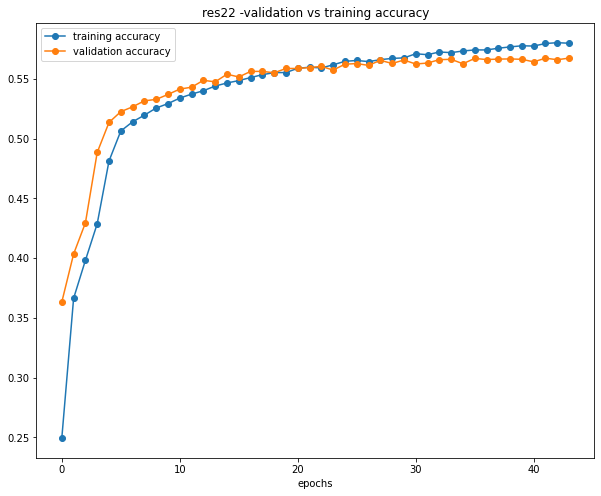

None

43/43 [==============================] - 4s 56ms/step


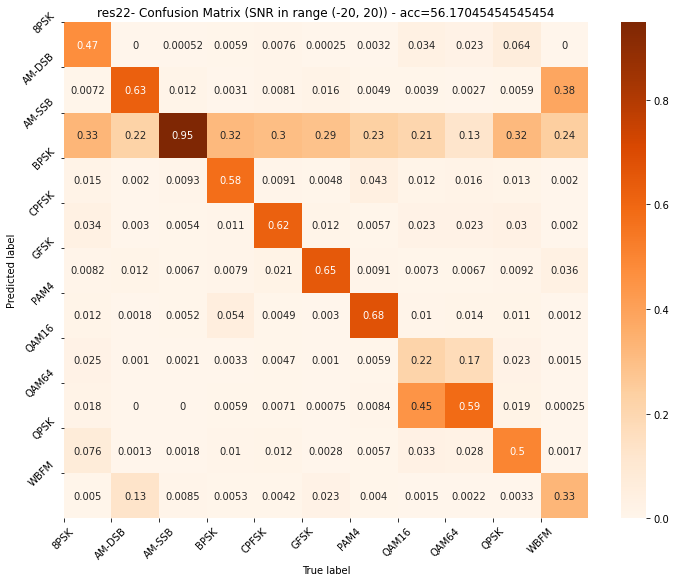

18/18 [==============================] - 1s 75ms/step


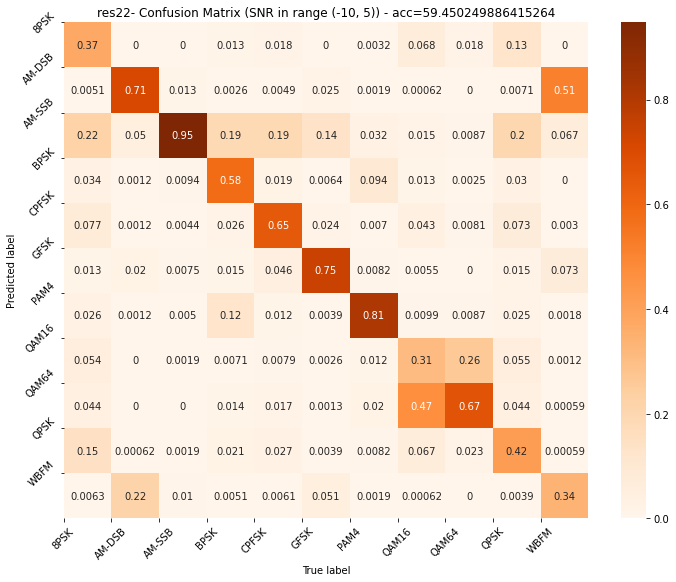

16/16 [==============================] - 1s 69ms/step


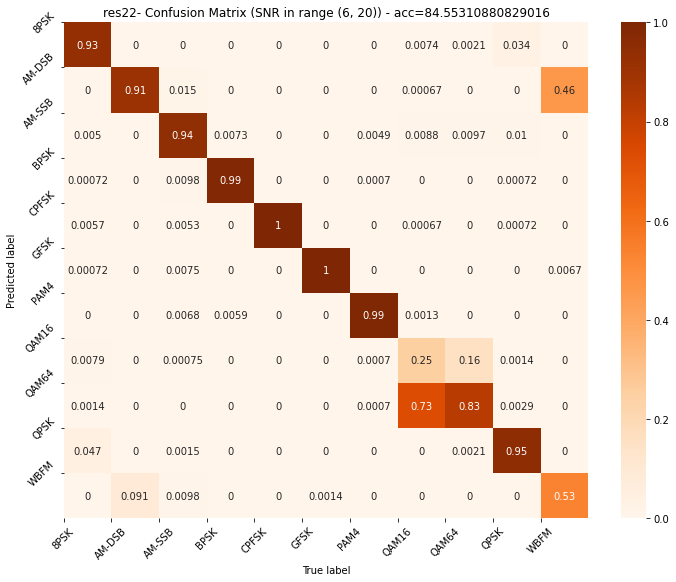

3/3 [==============================] - 1s 393ms/step


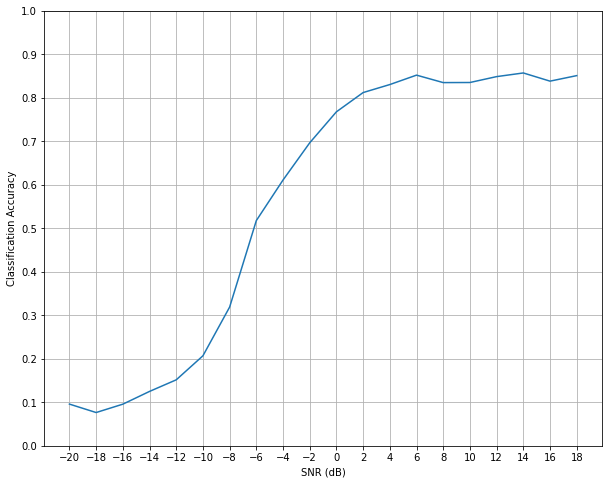

In [ ]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[2], X_train.shape[1])
X_val = X_val.reshape(X_val.shape[0], X_val.shape[2], X_val.shape[1])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[2], X_test.shape[1])
X_ap_train = X_ap_train.reshape(X_ap_train.shape[0], X_ap_train.shape[2], X_ap_train.shape[1])
X_ap_val = X_ap_val.reshape(X_ap_val.shape[0], X_ap_val.shape[2], X_ap_val.shape[1])
X_ap_test = X_ap_test.reshape(X_ap_test.shape[0], X_ap_test.shape[2], X_ap_test.shape[1])

res_model_evaluater = ModelEvaluater(newModel, [X_train,X_ap_train], y_train, [X_val,X_ap_val], y_val, [X_test,X_ap_test], y_test, labels_test, BATCH_SIZE, 'res22' )
res_model_evaluater.fit(EPOCHS, patience=PATIENCE)
res_model_evaluater.print_summary()